# Which one is the response variable?

Regression lets you predict the values of a response variable from known values of explanatory variables. Which variable you use as the response variable depends on the question you are trying to answer, but in many datasets, there will be an obvious choice for variables that would be interesting to predict. Over the next few exercises, you'll explore a Taiwan real estate dataset with four variables.

|Variable	|Meaning|
|-----------|-----------------|
|`dist_to_mrt_station_m`	|Distance to nearest MRT metro station, in meters.|
|`n_convenience`	|No. of convenience stores in walking distance.|
|`house_age_years`|	The age of the house, in years, in three groups.|
|`price_twd_msq`	|House price per unit area, in New Taiwan dollars per meter squared.|

Print `taiwan_real_estate` in the console to view the dataset, and decide which variable would make a good response variable.

a. `dist_to_mrt_station_m`

b. `n_convenience`

c. `house_age_years`

d. `price_twd_msq`

In [2]:
import pandas as pd

data = pd.read_csv('taiwan_real_estate2.csv')

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847
...,...,...,...,...
409,4082.01500,0,0 to 15,4.659607
410,90.45606,9,0 to 15,15.128593
411,390.96960,7,15 to 30,12.284418
412,104.81010,5,0 to 15,15.885023


# Visualizing two numeric variables
Before you can run any AI models, it's usually a good idea to visualize your dataset. Here, you'll look at the relationship between house price per area and the number of nearby convenience stores using the Taiwan real estate dataset.

One challenge in this dataset is that the number of convenience stores contains integer data, causing points to overlap. To solve this, you will make the points transparent.

## Exercise

1. Import the `seaborn` package, aliased as `sns`.

2. Using `taiwan_real_estate`, draw a scatter plot of `"price_twd_msq"` (y-axis) versus `"n_convenience"` (x-axis) using the `scatterplot` function.

3. Draw a trend line calculated using linear regression using the `regplot` function. 

In [ ]:
# Import seaborn with alias sns
____

# Import matplotlib.pyplot with alias plt
____

# Draw the scatter plot
sns.____(x=____, y=____, data=____)

# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.____(x=____, y=____, data=____)

# Show the plot
plt.____()

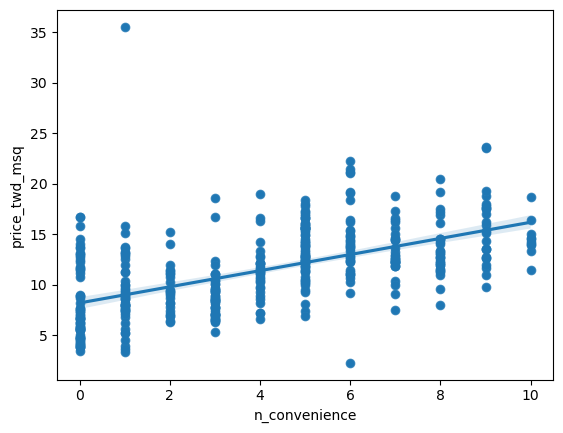

In [9]:
# Import seaborn with alias sns
import seaborn as sns

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Draw the scatter plot
sns.scatterplot(x='n_convenience', y='price_twd_msq', data=data)

# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(x='n_convenience', y='price_twd_msq', data=data)

# Show the plot
plt.show()

# Estimate the intercept

Linear regression models always fit a straight line to the data. Straight lines are defined by two properties: their intercept and their slope.

Here, you can see a scatter plot of house price per area versus number of nearby convenience stores, using the Taiwan real estate dataset.
 
## Exercise 

1. Estimate the intercept of the linear regression trend line.

a. 0

b. 8.22

c. 16.21

2. Estimate the slope of the linear regression trend line.

a. 0.8

b. 1

c. 8.22

# Linear regression with `ols()`

While `sns.regplot()` can display a linear regression trend line, it doesn't give you access to the intercept and slope as variables, or allow you to work with the model results as variables. That means that sometimes you'll need to run a linear regression yourself.

## Exercise 

- Import the `ols()` function from the `statsmodels.formula.api` package.
- Run a linear regression with `price_twd_msq` as the response variable, `n_convenience` as the explanatory variable, and `taiwan_real_estate` as the dataset. Name it `mdl_price_vs_conv`.
- Fit the model.
- Print the parameters of the fitted model.

In [ ]:
# Import the ols function
from ____ import ____

# Create the model object
mdl_price_vs_conv = ____("____ ~ ____", data=____)

# Fit the model
mdl_price_vs_conv = ____.____

# Print the parameters of the fitted model
print(____.____)

In [11]:
# Import the ols function
from statsmodels.formula.api import ols

# Create the model object
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=data)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


## Question

1. The model had an `Intercept` coefficient of `8.2242`. What does this mean?

- On average, houses had a price of `8.2242` TWD per square meter.

- On average, a house with zero convenience stores nearby had a price of `8.2242` TWD per square meter.

- The minimum house price was `8.2242` TWD per square meter.

- The minimum house price with zero convenience stores nearby was `8.2242` TWD per square meter.

- The intercept tells you nothing about house prices.

2. The model had an `n_convenience` coefficient of `0.7981`. What does this mean?

- If you increase the number of nearby convenience stores by one, then the expected increase in house price is `0.7981` TWD per square meter.

- If you increase the house price by `0.7981` TWD per square meter, then the expected increase in the number of nearby convenience stores is one.

- If you increase the number of nearby convenience stores by` 0.7981`, then the expected increase in house price is one TWD per square meter.

- If you increase the house price by one TWD per square meter, then the expected increase in the number of nearby convenience stores is `0.7981`.

- The n_convenience coefficient tells you nothing about house prices.

# Visualizing numeric vs. categorical

If the explanatory variable is categorical, the scatter plot that you used before to visualize the data doesn't make sense. Instead, a good option is to draw a histogram for each category.

The Taiwan real estate dataset has a categorical variable in the form of the age of each house. The ages have been split into 3 groups: 0 to 15 years, 15 to 30 years, and 30 to 45 years.

## Exercise

Using the `taiwan_real_estate` data, plot a histogram of `price_twd_msq` with `10` bins with the `displot` function. Split the plot by `house_age_years` to give 3 panels.

In [ ]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.____(data=____,
         x=____,
         col=____,
         bins=____)

# Show the plot
____

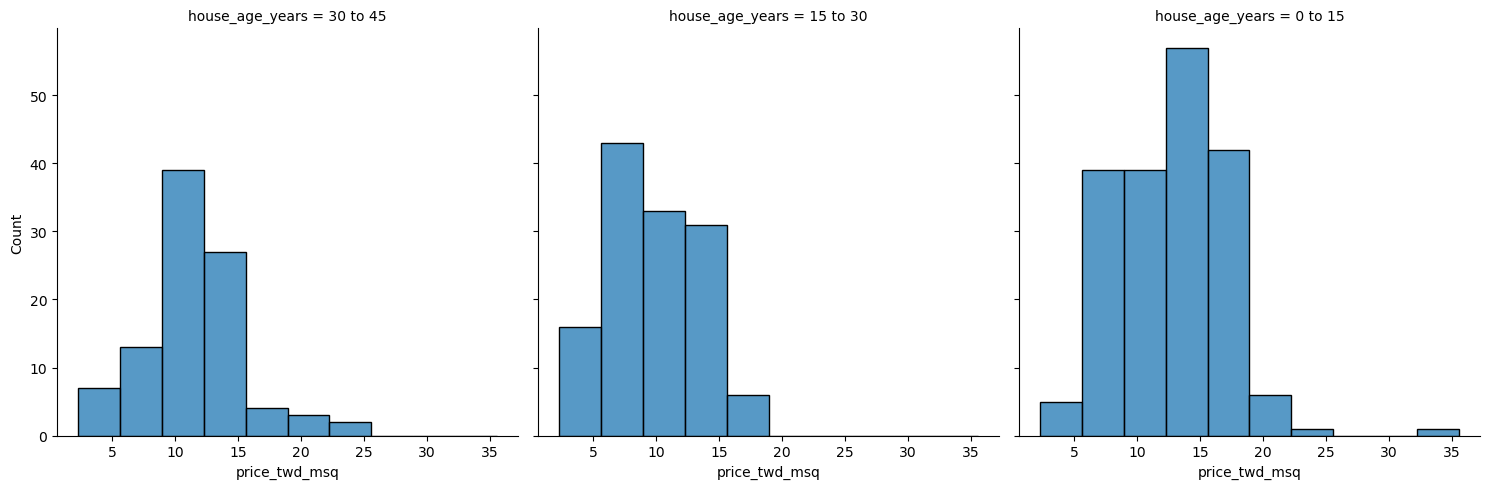

In [15]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=data,
         x='price_twd_msq',
         col='house_age_years',
         bins=10)

# Show the plot
plt.show()

# Calculating means by category

A good way to explore categorical variables further is to calculate summary statistics for each category. For example, you can calculate the mean and median of your response variable, grouped by a categorical variable. As such, you can compare each category in more detail.

Here, you'll look at grouped means for the house prices in the Taiwan real estate dataset. This will help you understand the output of a linear regression with a categorical variable.

## Exercise
- Using the `groupby` function, group `taiwan_real_estate` data by `house_age_years` and calculate the mean price (`price_twd_msq`) for each age group. Assign the result to `mean_price_by_age`.
- Print the result and inspect the output.

In [ ]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = ____.____(____)[____].____

# Print the result
print(____)

In [16]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = data.groupby('house_age_years')['price_twd_msq'].mean()

# Print the result
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


# Linear regression with a categorical explanatory variable

To run a linear regression model with categorical explanatory variables, you can use the same code as with numeric explanatory variables. The coefficients returned by the model are different, however. 

## Exercise 
- Run and fit a linear regression with `price_twd_msq` as the response variable, `house_age_years` as the explanatory variable. Assign the result to `mdl_price_vs_age`.
- Print its parameters.
- Update the model formula so that no intercept is included in the model. Assign to `mdl_price_vs_age0`.
- Print its parameters.

In [ ]:
# Create the model, fit it
mdl_price_vs_age = ____('____ ~ ____', data=____).____

# Print the parameters of the fitted model
print(____.____)

# Create the model without the intercept, fit it
mdl_price_vs_age0 = ____('____ ~ ____', data=____).____

# Print the parameters of the updated fitted model
print(____.____)

In [19]:
# Create the model, fit it
mdl_price_vs_age = ols('price_twd_msq ~ house_age_years', data=data).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

# Create the model, fit it
mdl_price_vs_age0 = ols('price_twd_msq ~ 0 + house_age_years', data=data).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64
house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


# Predicting house prices

Perhaps the most useful feature of statistical models like linear regression is that you can make predictions. That is, you specify values for each of the explanatory variables, feed them to the model, and get a prediction for the corresponding response variable. The code flow is as follows.

```
explanatory_data = pd.DataFrame({"explanatory_var": list_of_values})
predictions = model.predict(explanatory_data)
prediction_data = explanatory_data.assign(response_var=predictions)
```
Here, you'll make predictions for the house prices in the Taiwan real estate dataset.

taiwan_real_estate is available. The fitted linear regression model of house price versus number of convenience stores is available as mdl_price_vs_conv. For future exercises, when a model is available, it will also be fitted.

## Exercise 
- Import the `numpy` package using the alias `np`.
- Create a `DataFrame` of explanatory data, where the number of convenience stores, `n_convenience`, takes the integer values from zero to ten.
- Print explanatory_data.
- Use the model `mdl_price_vs_conv` to make predictions from explanatory_data and store it as `price_twd_msq`.
- Print the predictions.
- Create a `DataFrame` of predictions named `prediction_data`. Start with `explanatory_data`, then add an extra column, `price_twd_msq`, containing the predictions you created in the previous step.


In [ ]:
# Import numpy with alias np
import numpy as np

# Create the explanatory_data 
explanatory_data = pd.DataFrame({'____': np.arange(____)})

# Print it
____

# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = ____

# Print it
print(price_twd_msq)

# Create prediction_data
prediction_data = ____.assign(____ = ____)

# Print the result
print(prediction_data)

In [25]:
# Import numpy with alias np
import numpy as np

# Create the model object and Fit the model
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=data)
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Create the explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0,11)})

# Print it
print(explanatory_data)

# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

# Print it
print(price_twd_msq)

# Create prediction_data
prediction_data = explanatory_data.assign(price_twd_msq=price_twd_msq)

# Print the result
print(prediction_data)

    n_convenience
0               0
1               1
2               2
3               3
4               4
5               5
6               6
7               7
8               8
9               9
10             10
0      8.224237
1      9.022317
2      9.820397
3     10.618477
4     11.416556
5     12.214636
6     13.012716
7     13.810795
8     14.608875
9     15.406955
10    16.205035
dtype: float64
    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


# Visualizing predictions
The prediction DataFrame you created contains a column of explanatory variable values and a column of response variable values. That means you can plot it on the same scatter plot of response versus explanatory data values.

## Exercise 
- Create a new figure to plot multiple layers.
- Extend the plotting code to add points for the predictions in `prediction_data`. Color the points red.
- Display the layered plot.

In [ ]:
# Create a new figure, fig
fig = plt.figure()

sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=data,
            ci=None)
# Add a scatter plot layer to the regplot
sns.scatterplot(x="____",
                y="____",
                data=____,
                color="____",
                marker='s')

# Show the layered plot
plt.____()

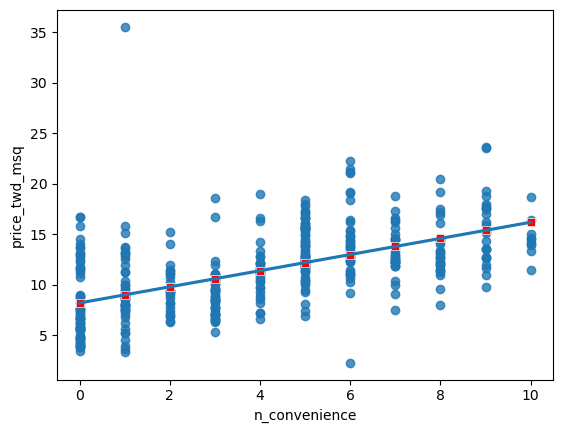

In [27]:
# Create a new figure, fig
fig = plt.figure()

sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=data,
            ci=None)
# Add a scatter plot layer to the regplot
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=prediction_data,
                color="red",
                marker='s')

# Show the layered plot
plt.show()